<a href="https://colab.research.google.com/github/Lithikhaa/LinearRegression/blob/main/linear_regression_python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('heart1.csv')

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
df.shape

(310, 14)

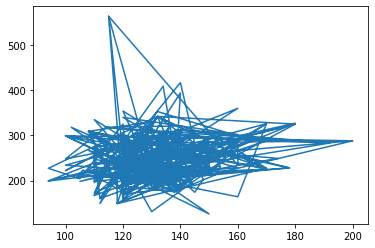

In [16]:
x = df.trestbps
y =  df.chol
plt.plot(x,y)
plt.show()

In [17]:
mean_x = np.mean(x)
mean_y = np.mean(y)

n = len(x)

num = 0
deno = 0
for i in range (n):
  num += (x[i]-mean_x) * (y[i]-mean_y)
  deno +=(x[i]-mean_x) ** 2

b1 =  num/deno
b0 = mean_y - (b1 * mean_x)

print(b1,b0)


0.3564930314592571 200.4763172397951


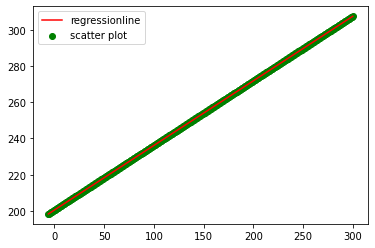

In [18]:
b1 =  num/deno
b0 = mean_y - (b1 * mean_x)



max = np.max(x) + 100
min = np.min(x) - 100

x = np.linspace(min,max,500)
y = b0 + b1 * x

plt.plot(x, y,color='red',label= 'regressionline')

plt.scatter(x, y,color='green',label= 'scatter plot')
plt.legend()
plt.show()


In [19]:
st = 0
sr = 0
for i in range(n):
  y_pred = b0 + b1 * x[i]
  st += (y[i]-mean_y) ** 2
  sr += (y[i]-y_pred) ** 2
r = 1 - (sr/st)
print(r)


1.0


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [42]:
x = np.random.rand(500)
y = np.random.randn(500)

# Reshape x to have 500 rows and 1 column
x = x.reshape((500, 1))


reg = LinearRegression()
reg = reg.fit(x,y)
y_pred = reg.predict(x)
r_score = reg.score(x,y)
print(r_score)

0.002926532757550948


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the heart disease dataset
df = pd.read_csv('heart1.csv')

# Split the data into training and testing sets
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = reg.predict(X_test)

# Convert the predicted values to binary predictions (0 or 1)
y_pred_bin = [0 if y < 0.5 else 1 for y in y_pred]

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_bin)
print('Accuracy:', accuracy)


Accuracy: 0.8387096774193549
